# **Outlier Detection Using Percentile**

# **Simple DataSet**

In [7]:
import pandas as pd
df=pd.read_csv("heights.csv")
df

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9
5,khusbu,5.4
6,dmitry,6.2
7,selena,6.5
8,john,7.1
9,imran,14.5


In [8]:
max_threshold=df['height'].quantile(0.95)
max_threshold

9.689999999999998

In [9]:
df[df['height']>max_threshold]

,name,height
9,imran,14.5


In [10]:
min_threshold=df['height'].quantile(0.05)
min_threshold

3.6050000000000004

In [11]:
df[df['height']<min_threshold]

,name,height
12,yoseph,1.2


In [12]:
df=pd.DataFrame(df[(df['height']<max_threshold) & (df['height']>min_threshold)])
df

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9
5,khusbu,5.4
6,dmitry,6.2
7,selena,6.5
8,john,7.1
10,jose,6.1


# **Complex DataSet**

In [13]:
import pandas as pd
df=pd.read_csv("bhp.csv")
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [14]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [15]:
min_threshold,max_threshold=df.price_per_sqft.quantile([0.001,0.999])
min_threshold,max_threshold

(1366.184, 50959.36200000098)

In [16]:
df=pd.DataFrame(df[(df['price_per_sqft']<max_threshold) & (df['price_per_sqft']>min_threshold)])
df.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
10176,Electronic City,3 BHK,1400.0,2.0,40.45,3,2889
6573,Whitefield,4 BHK,2856.0,5.0,157.50,4,5514
363,5th Phase JP Nagar,2 BHK,1075.0,2.0,60.00,2,5581
11371,other,1 Bedroom,1200.0,1.0,39.82,1,3318
1050,Hebbal,4 BHK,3900.0,4.0,410.00,4,10512


# **Outliers Detection Using Standard Deviation**

In [17]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10,5)

In [18]:
df=pd.read_csv("heights (1).csv")
df

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


<function matplotlib.pyplot.show(close=None, block=None)>

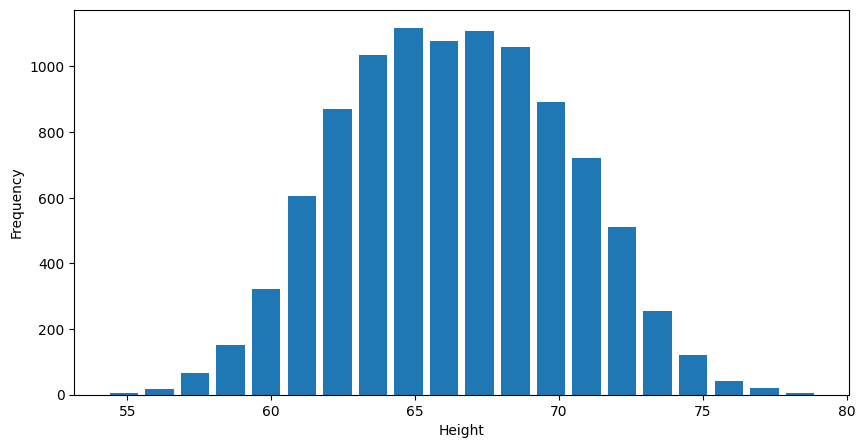

In [19]:
plt.hist(df['height'],bins=20,rwidth=0.8)
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

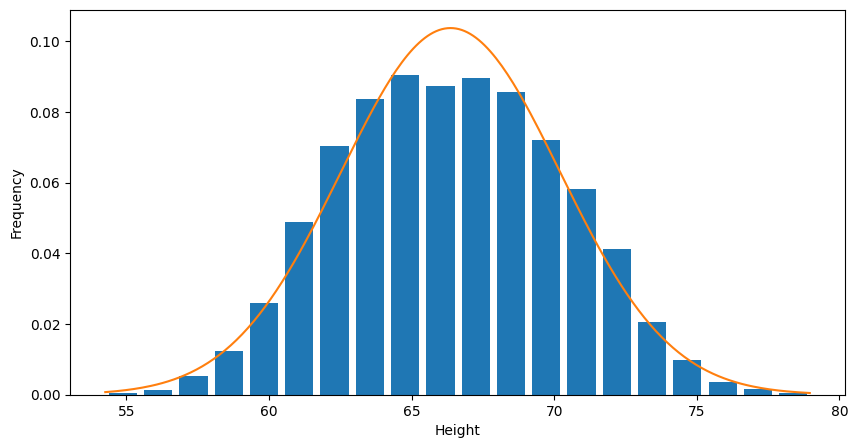

In [20]:
from scipy.stats import norm
import numpy as np
plt.hist(df['height'],bins=20,rwidth=0.8,density=True)
plt.xlabel('Height')
plt.ylabel('Frequency')
rng=np.arange(df['height'].min(),df['height'].max(),0.1)
plt.plot(rng,norm.pdf(rng,df['height'].mean(),df['height'].std()))
plt.show


In [21]:
df.height.mean()

66.367559754866

In [22]:
df.height.std()

3.847528120795573

In [23]:
upper_limit=df.height.mean()+3*df.height.std()
upper_limit

77.91014411725271

In [24]:
lower_limit=df.height.mean()-3*df.height.std()
lower_limit

54.824975392479274

In [25]:
df[(df.height>upper_limit) | (df.height<lower_limit)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [26]:
df=pd.DataFrame(df[(df.height<upper_limit) & (df.height>lower_limit)])
df

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


# **Outliers Detection Using Z_Score**

In [27]:
df['zscore']=(df.height-df.height.mean())/df.height.std()
df

,gender,height,zscore
0,Male,73.847017,1.951021
1,Male,68.781904,0.630437
2,Male,74.110105,2.019613
3,Male,71.730978,1.399324
4,Male,69.881796,0.917202
...,...,...,...
9995,Female,66.172652,-0.049851
9996,Female,67.067155,0.183365
9997,Female,63.867992,-0.650725
9998,Female,69.034243,0.696227


In [28]:
df[df.zscore>3]

,gender,height,zscore


In [29]:
df[df.zscore<-3]

,gender,height,zscore


In [30]:
new_df=df[(df.zscore>-3) & (df.zscore<3)]
new_df

,gender,height,zscore
0,Male,73.847017,1.951021
1,Male,68.781904,0.630437
2,Male,74.110105,2.019613
3,Male,71.730978,1.399324
4,Male,69.881796,0.917202
...,...,...,...
9995,Female,66.172652,-0.049851
9996,Female,67.067155,0.183365
9997,Female,63.867992,-0.650725
9998,Female,69.034243,0.696227


# **Outlier Detection Using IQR**

In [31]:
df1=pd.read_csv("heights (2).csv")
df1

,name,height
0,mohan,1.2
1,maria,2.3
2,sakib,4.9
3,tao,5.1
4,virat,5.2
5,khusbu,5.4
6,dmitry,5.5
7,selena,5.5
8,john,5.6
9,imran,5.6


In [32]:
df1.describe()

,height
count,20.000000
mean,8.390000
std,8.782812
min,1.200000
25%,5.350000
50%,5.700000
75%,6.275000
max,40.200000


In [33]:
Q1=df1.height.quantile(0.25)
Q3=df1.height.quantile(0.75)
Q1,Q3

(5.3500000000000005, 6.275)

In [35]:
IQR=Q3-Q1
IQR

0.9249999999999998

In [36]:
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR
upper_limit,lower_limit

(7.6625, 3.962500000000001)

In [37]:
df1[(df1.height>upper_limit) | (df1.height<lower_limit)]

,name,height
0,mohan,1.2
1,maria,2.3
17,aamir,14.5
18,ken,23.2
19,Liu,40.2


In [38]:
new_df=df1[(df1.height<upper_limit) & (df1.height>lower_limit)]
new_df

,name,height
2,sakib,4.9
3,tao,5.1
4,virat,5.2
5,khusbu,5.4
6,dmitry,5.5
7,selena,5.5
8,john,5.6
9,imran,5.6
10,jose,5.8
11,deepika,5.9
